In [1]:
# by default Keras's model.compile() sets the shuffle argument as True. 
# You should the set numpy seed before importing keras. e.g.:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
# get path
os.getcwd()

'/Users/kwonk/Documents/Bootcamp/Twitter-Sentiment-Analysis/LSTM'

In [3]:
import pandas as pd 
import seaborn

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print(os.listdir("../LSTM/input"))

['.DS_Store', 'test.csv', 'train.csv']


In [4]:
# The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and 
# statistical natural language processing for English written in the Python programming language.
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.
from tqdm import tqdm

In [5]:
# Use Keras Tensorflow deeplearning library

from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam




In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.pylab import rcParams

from sklearn.metrics import roc_curve,auc,make_scorer, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import eli5 # for permutation importance
from eli5.sklearn import PermutationImportance

import shap # for SHAP value
from pdpbox import pdp, info_plots # flor partial plots 

pd.options.mode.chained_assignment = None  #hide any pandas warnings
%matplotlib inline

In [7]:
# Load Dataset
train= pd.read_csv("../LSTM/input/train.csv")
test = pd.read_csv("../LSTM/input/test.csv")

train.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
# pip install ftfy
# import ftfy
# ftfy.fix_text(train[train['tweet']])

In [9]:
train.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [10]:
# Train dataset: Need only class as "Sentiment" and text as 'Phrase'
train = train.rename(columns={'class':'Sentiment','tweet':'Phrase'})
train = train.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],axis=1).copy()
train.head()

,Sentiment,Phrase
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
test.head()

,Text,Date,Favorites,Retweets,Tweet ID
0,Nielson Media Research final numbers on ACCEPT...,7/30/16 23:32,13850,4130,7.600000e+17
1,Thank you to all of the television viewers tha...,7/30/16 19:00,27659,6842,7.600000e+17
2,Can you imagine if I had the small crowds that...,7/30/16 18:28,19968,6488,7.600000e+17
3,NATO commander agrees members should pay up vi...,7/30/16 18:24,11624,4668,7.600000e+17
4,"Wow, NATO's top commander just announced that ...",7/30/16 18:18,23922,7819,7.600000e+17


In [12]:
test.columns

Index(['Text', 'Date', 'Favorites', 'Retweets', 'Tweet ID'], dtype='object')

In [13]:
# Test dataset: Need only text as 'Phrase'
test = test.rename(columns={'Text':'Phrase'})
test = test.drop(['Date', 'Favorites', 'Retweets', 'Tweet ID'],axis=1).copy()
test.head()

,Phrase
0,Nielson Media Research final numbers on ACCEPT...
1,Thank you to all of the television viewers tha...
2,Can you imagine if I had the small crowds that...
3,NATO commander agrees members should pay up vi...
4,"Wow, NATO's top commander just announced that ..."


In [14]:
train.shape

(24778, 2)

In [15]:
train.dtypes

Sentiment     int64
Phrase       object
dtype: object

In [16]:
test.shape

(29886, 1)

In [17]:
test.dtypes

Phrase    object
dtype: object

In [18]:
# Clean tweets, tokenize, and lemmatize
#     remove html content
#     remove non-alphabetic characters
#     tokenize the sentences
#     lemmatize each word to its lemma (the basic or stem of that word)
        # ex) playing --> play

In [19]:
# Need to Save the split texts before cleaning and tokenizing
# Collect dependent values and convert to ONE-HOT encoding
# Output using to_categorical
target_t = train.Sentiment.values
y_target_t = to_categorical(target_t)

# Save the texts before tokenizing (must use the same random seed)
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(train,y_target_t,test_size=0.2,random_state=42,stratify=y_target_t)

In [20]:
def clean_sentences(df):
    tweets = []
    
    for sent in tqdm(df['Phrase']):
        
        # remove non-alphabetic characters
        tweet_text = re.sub("[^a-zA-Z]"," ", str(sent))
        
        #remove html content
        tweet_text = BeautifulSoup(tweet_text).get_text()
        
        # tokenize
        words = word_tokenize(tweet_text.lower())
        
        # lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
        
        tweets.append(lemma_words)
        
    return(tweets)

In [21]:
# cleaned tweets for both train and test set retrieved

train_sentences = clean_sentences(train)

100%|██████████| 24778/24778 [00:11<00:00, 2225.24it/s]


In [22]:
test_sentences = clean_sentences(test)

100%|██████████| 29886/29886 [00:11<00:00, 2622.25it/s]


In [23]:
print(len(train_sentences))
print(len(test_sentences))

24778
29886


In [24]:
train_sentences[3]

['rt',
 'c',
 'g',
 'anderson',
 'viva',
 'based',
 'she',
 'look',
 'like',
 'a',
 'tranny']

In [25]:
test_sentences[1000]

['heading',
 'to',
 'rally',
 'with',
 'bobby',
 'now',
 'see',
 'you',
 'soon',
 'pic',
 'twitter',
 'com',
 'dwssoectzn']

In [26]:
# Collect dependent values and convert to ONE-HOT encoding
# Output using to_categorical
target = train.Sentiment.values
y_target = to_categorical(target)
num_classes = y_target.shape[1]

In [27]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_sentences,y_target,test_size=0.2,random_state=42,stratify=y_target)

In [28]:
# Getting the no of unique words and max length of a tweet available in the list of cleaned tweets
# It is needed for initializing tokenizer of keras and subsequent padding

# Build an unordered collection of unique elements.
unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max=len(sent)

# length of the list of unique_words gives the no of unique words

print(len(list(unique_words)))
print(len_max)


100%|██████████| 19822/19822 [00:00<00:00, 541717.12it/s]

28701
53


In [29]:
# Actual tokenizer of keras and convert to sequences

tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))

# texts_to_sequences
# ARGUMENTS: list of texts to turn to sequences
# RETURN: list of sequences (one per text input)

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

In [30]:
# Padding is done to equalize the lengths of all input tweets.
# LTSM networks need all inputs to be same length.
# Therefore, tweets lesser than max length will be made equal using extra zeros at end. This is padding.
# Also, you always have to give a three-dimensional array as an input to your LSTM network

X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)

print(X_train.shape,X_val.shape,X_test.shape,y_val.shape,y_train.shape)

(19822, 53) (4956, 53) (29886, 53) (4956, 3) (19822, 3)


In [31]:
# Early stopping to prevent overfitting deep learning neural network models
# This is a method that allows you to specify an arbitrary large number of training epochs.
# This stops training once the model performance stops improving on a hold out validation dataset


early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor = 'val_acc', patience = 2)
callback = [early_stopping]


In [32]:
# Model with Keras LSTM
# Multilayer Perceptron (MLP) for multi-class softmax classification
# Build NLP model called: Long Short Term Memory Network
# This model works on sequenced data
# It's good for NLP task like tagging and text classification
# It treats text as a sequence rather than a bag of words or as ngrams

In [33]:
# LSTM hyperparameters for reference

# Embedding(
#     input_dim,
#     output_dim,
#     embeddings_initializer='uniform',
#     embeddings_regularizer=None,
#     activity_regularizer=None,
#     embeddings_constraint=None,
#     mask_zero=False,
#     input_length=None,
#     **kwargs,
# )

# LSTM(
#     units,
#     activation='tanh',
#     recurrent_activation='hard_sigmoid',
#     use_bias=True,
#     kernel_initializer='glorot_uniform',
#     recurrent_initializer='orthogonal',
#     bias_initializer='zeros',
#     unit_forget_bias=True,
#     kernel_regularizer=None,
#     recurrent_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     recurrent_constraint=None,
#     bias_constraint=None,
#     dropout=0.0,
#     recurrent_dropout=0.0,
#     implementation=1,
#     return_sequences=False,
#     return_state=False,
#     go_backwards=False,
#     stateful=False,
#     unroll=False,
#     **kwargs,
# )

![lstm_network](../LSTM/figures/lstm_network.png)

In [34]:
# model = Sequential()

In [35]:
# model.add(Embedding(len(list(unique_words)),300,input_length=len_max))

In [36]:
# If return_sequence is True, the output is a 3D array. (batch_size, time_steps, units)
# Tensorflow’s num_units is the size of the LSTM’s hidden state (which is also the size of the output if 
# no projection is used). To make the name num_units more intuitive, you can think of it as the number of hidden units in the LSTM cell, 
# or the number of memory units in the cell.
# model.add(LSTM(128,dropout=0.5,recurrent_dropout=0.5,return_sequences=True))

In [37]:
# if return_sequence is False, the output is a 2D array. (batch_size, units)
# model.add(LSTM(64,dropout=0.5,recurrent_dropout=0.5,return_sequences=False))

In [38]:
# model.add(Dense(100,activation='relu'))

In [39]:
# model.add(Dropout(0.5))
# help reducing interdependent learning amongst the neurons by ignoring certain neurons at random at each training stage 

In [40]:
# model.add(Dense(num_classes,activation='softmax'))

In [41]:
# model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])

In [42]:
# model.summary()

In [43]:
# # Keras doesn't have f1 score in metrics - therefore we have to manually calculate
# from keras import backend as K

# def recall_m(y_val, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_val * y_pred, 0, 1)))
#         possible_positives = K.sum(K.round(K.clip(y_val, 0, 1)))
#         recall = true_positives / (possible_positives + K.epsilon())
#         return recall

# def precision_m(y_val, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_val * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision

# def f1_m(y_val, y_pred):
#     precision = precision_m(y_val, y_pred)
#     recall = recall_m(y_val, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [44]:
# HYPERTUNING the model

# 1. Diagnostics -plot the results  - is it over or underfitting?
# 2. Weight Initialization.
# 3. Learning Rate.
# 4. Activation Functions - softmax is best for now.
# 5. Network Topology - How many layers do you need? No one knows. No one. Don’t ask..
# 6. Batches and Epochs.
# 7. Regularization.
# 8. Optimization and Loss.
# 9. Early Stopping.

In [45]:
# re-run model everytime new parameter changes (must run sequential to initialize epoch)

model = Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(LSTM(128,dropout=0.5,recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5,recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu')) #try elu
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
#Compile with more metrics to evaluate model
#model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005), metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 53, 300)           8610300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 53, 128)           219648    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)      

In [46]:
# # Compile with more metrics to evaluate model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [47]:
# hyperparameter tuning
# EPOCH: One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
# As the number of epochs increases, more number of times the weight are changed in the neural network 
# and the curve goes from underfitting to optimal to overfitting curve.

# BATCH: Total number of training examples present in a single batch. 
#you can’t pass the entire dataset into the neural net at once. 
# So, you divide dataset into Number of Batches or sets or parts.

# ITERATION: Iterations is the number of batches needed to complete one epoch.
# Ex) Our train n=19822
# With batch size of 200, there are 99 iterations for 1 epoch.

In [48]:
# Create weights: Our dataset has only 5.8% HATE, 16.8% Neither and majority 77.4% Offensive 
# To balance the classifiers, we will set Hate and Offensive weights greater than Offensive

In [49]:
# create pandas df for y_train
# Describe classifier hate (0), offensive (1), neither or neutral (2)

y_df = pd.DataFrame(y_train)
y_df.describe()

,0,1,2
count,19822.000000,19822.000000,19822.000000
mean,0.057714,0.774291,0.167995
std,0.233225,0.418088,0.373885
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [50]:
# Sum up the no. of records for each classifier
hate_num = y_df[0].sum()
offensive_num = y_df[1].sum()
neutral_num = y_df[2].sum()

In [51]:
# check hate (1144/19822 = 5.8%)
hate_num

1144.0

In [52]:
# check offensive (15348/19822 = 77.4%)
offensive_num

15348.0

In [53]:
# check neutral (3333/19822 = 16.8%)
neutral_num

3330.0

In [54]:
# Do inverse ratio so that hate and neutral has a higher weight
1 - hate_num / len(y_df)

0.9422863485016648

In [55]:
1 - neutral_num / len(y_df)

0.8320048431036222

In [56]:
# Inverse ratio will give offensive a lower weight
1 - offensive_num / len(y_df)

0.22570880839471297

In [57]:
# fit the model adjusting for epochs, batch, and weight
# The model.fit method returns a History callback, 
# which has a history attribute containing the lists of successive losses and other metrics.

model.fit(
    X_train, y_train, 
    validation_data=(X_val,y_val),
    epochs=15, #may not run all due to callback
    batch_size=256, #faster with larger batch_size but it's generalizing
    verbose=1,
    callbacks=callback, #stops training once the model stops improving. Prevents overfitting.
    class_weight={0: .94, 1: .23, 2: .83} #use inverse ratio to set hate with highest weight (somewhat arbitrary)
) 

Instructions for updating:
Use tf.cast instead.
Train on 19822 samples, validate on 4956 samples
Epoch 1/15
19822/19822 [==============================] - 157s 8ms/step - loss: 0.2646 - acc: 0.8042 - val_loss: 0.3560 - val_acc: 0.8695
Epoch 2/15
19822/19822 [==============================] - 153s 8ms/step - loss: 0.1474 - acc: 0.8862 - val_loss: 0.3247 - val_acc: 0.8892
Epoch 3/15
19822/19822 [==============================] - 153s 8ms/step - loss: 0.0961 - acc: 0.9215 - val_loss: 0.3394 - val_acc: 0.8916
Epoch 4/15
19822/19822 [==============================] - 156s 8ms/step - loss: 0.0583 - acc: 0.9493 - val_loss: 0.3924 - val_acc: 0.8777
Epoch 5/15
19822/19822 [==============================] - 154s 8ms/step - loss: 0.0328 - acc: 0.9703 - val_loss: 0.4703 - val_acc: 0.8906


In [58]:
print(model.history)

[<matplotlib.lines.Line2D at 0x1c5b23d470>]

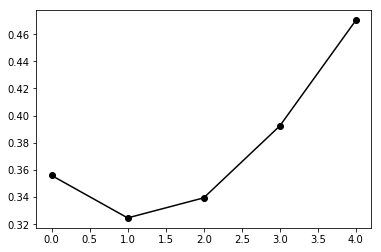

In [59]:
plt.plot(list(model.history.history.values())[0],'k-o')

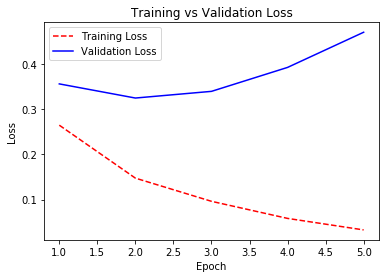

In [60]:
# Create count of the number of epochs
epoch_count = range(1,len(model.history.history['loss']) + 1)

# Visualize the learning curve.

plt.plot(epoch_count,model.history.history['loss'],'r--')
plt.plot(epoch_count,model.history.history['val_loss'],'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')

# save figure
plt.savefig('../LSTM/figures/loss.png')

plt.show()

In [61]:
# Loss: A scalar value that we attempt to minimize during our training of the model. 
# The lower the loss, the closer our predictions are to the true labels.
# The lower the loss, the better a model (unless the model has over-fitted to the training data). 
# The loss is calculated on training and validation and its interperation is how well the model is doing for 
# these two sets. Unlike accuracy, loss is not a percentage. 
# It is a summation of the errors made for each example in training or validation sets.

In [62]:
# Predict validation sentiment!

y_pred = model.predict(X_val)

In [63]:
# Evaluate model
#loss, accuracy, f1_score, precision, recall = model.evaluate(X_val,y_val,verbose=1)
loss,accuracy = model.evaluate(X_val,y_val,verbose=1)

4956/4956 [==============================] - 14s 3ms/step


In [64]:
print(f"loss {loss}")
print(f"accuracy {accuracy}")
#print(f"f1 score {f1_score}")
#print(f"precision {precision}")
#print(f"recall {recall}")

loss 0.4702838792543049
accuracy 0.8906376109284869


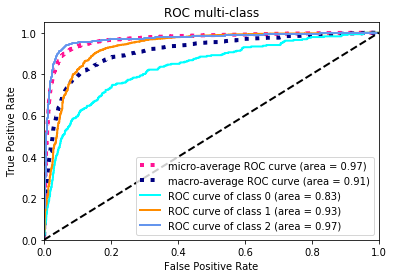

In [65]:
# Use trained Keras model to predict test inputs and generate ROC data
# Plot ROC for each of the 3 classes


import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# 3 classes to classify
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC multi-class')
plt.legend(loc="lower right")

# Save figure
plt.savefig('../LSTM/figures/roc.png')

plt.show()



In [66]:
# Keras and Sklearn read arrays differently
# Create function to convert keras array to show only one highest sentiment result per list
def keras_output_sklearn(y):
    
    result = []
    
    for element in y:
        result.append(np.argmax(element))
        

    return result

In [67]:
# use sklearn's confusion matrix to view correlation between truth and prediction
# use keras_output_sklearn function to reshape
confusion_matrix_t = confusion_matrix(keras_output_sklearn(y_val),keras_output_sklearn(y_pred))
# counts in each cell
confusion_matrix_t

array([[ 113,  144,   29],
       [ 149, 3552,  137],
       [  19,   64,  749]])

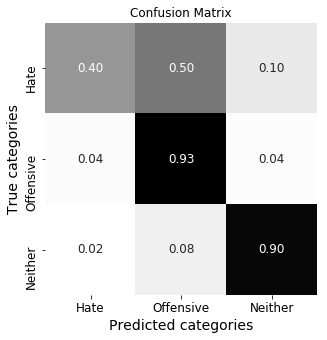

In [68]:
# Use seaborn to see counts in percentages
# Truth categories yield 100%
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix_t[i,:]/float(confusion_matrix_t[i,:].sum())
names=['Hate','Offensive','Neither']
# save result as pandas df
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.title('Confusion Matrix')
plt.tick_params(labelsize=12)

#Uncomment line below if you want to save the output
plt.savefig('../LSTM/figures/confusion.png')


In [69]:
# classification report
report = classification_report(keras_output_sklearn(y_val), keras_output_sklearn(y_pred))
print(report)

              precision    recall  f1-score   support

           0       0.40      0.40      0.40       286
           1       0.94      0.93      0.93      3838
           2       0.82      0.90      0.86       832

    accuracy                           0.89      4956
   macro avg       0.72      0.74      0.73      4956
weighted avg       0.89      0.89      0.89      4956



In [70]:
# Create joblib file
# from joblib import dump, load
# dump(model,'lstm.joblib')

## Save MODEL

In [71]:
from keras.models import load_model

model.save('lstm_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('lstm_model.h5',compile=False)

In [72]:
# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

In [73]:
# to load it again
# model reconstruction from JSON:
from keras.models import model_from_json
model = model_from_json(json_string)

# model reconstruction from YAML:
from keras.models import model_from_yaml
model = model_from_yaml(yaml_string)

## Compare tweets from validation set prediction vs truth

In [74]:
keras_output_sklearn(y_pred[3166:3168])

[1, 1]

In [75]:
keras_output_sklearn(y_val[3166:3168])

[1, 1]

In [76]:
X_val[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 8469,  205,    2,    1,
         15,   20,   50,   18,    7,   44,  102,    5, 8244], dtype=int32)

In [77]:
X_val[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 8469,  205,    2,    1,
         15,   20,   50,   18,    7,   44,  102,    5, 8244], dtype=int32)

In [78]:
# create pandas df 
df_predict = pd.DataFrame(keras_output_sklearn(y_pred))

In [79]:
df_predict.head()

,0
0,2
1,1
2,1
3,1
4,0


In [80]:
df_truth = pd.DataFrame(keras_output_sklearn(y_val))
df_truth.head()

,0
0,2
1,1
2,1
3,1
4,1


In [81]:
# merge predict and merge
df_compare = pd.merge(df_predict,df_truth,left_index=True,right_index=True,
                      suffixes=('_predict', '_truth'))


In [82]:
df_compare.head()

,0_predict,0_truth
0,2,2
1,1,1
2,1,1
3,1,1
4,0,1


In [83]:
# Non-tokenized splits X_train_t, X_val_t, y_train_t, y_val_t 
X_val_t.head()

,Sentiment,Phrase
3166,2,@FightNightX @NMF4Life khan has been facing no...
22896,1,Why the most Ratchet bitches be talkin shit? Y...
19022,1,RT @fvckzaina: The only D yah bitches should b...
19429,1,RT @khulekile_32220: The karma of fucking over...
8547,1,Cruising in my go kart at walmart selling cupc...


In [84]:
# reset index on X_val_t
X_val_df = X_val_t.reset_index()
X_val_df.head(10)

,index,Sentiment,Phrase
0,3166,2,@FightNightX @NMF4Life khan has been facing no...
1,22896,1,Why the most Ratchet bitches be talkin shit? Y...
2,19022,1,RT @fvckzaina: The only D yah bitches should b...
3,19429,1,RT @khulekile_32220: The karma of fucking over...
4,8547,1,Cruising in my go kart at walmart selling cupc...
5,6811,0,@passIt2Liv Hit a bitch it's not like you can ...
6,21016,1,Some bitches curve game be too serious
7,18242,1,RT @_BeautifulKeezy: &#8220;@100046729: Small ...
8,3411,1,@Hunglikerobby_ @triple6em96 @bbluedreamm brus...
9,21475,0,The #midwest of the US is white trash.


In [85]:
# merge actual tweet
df_compare_text = pd.merge(df_compare,X_val_df,left_index=True,right_index=True)

In [86]:
df_compare_text.head()

,0_predict,0_truth,index,Sentiment,Phrase
0,2,2,3166,2,@FightNightX @NMF4Life khan has been facing no...
1,1,1,22896,1,Why the most Ratchet bitches be talkin shit? Y...
2,1,1,19022,1,RT @fvckzaina: The only D yah bitches should b...
3,1,1,19429,1,RT @khulekile_32220: The karma of fucking over...
4,0,1,8547,1,Cruising in my go kart at walmart selling cupc...


In [87]:
df_compare_sentiment = df_compare_text[df_compare_text['0_predict']!=df_compare_text['0_truth']]

In [88]:
df_compare_sentiment.head()

,0_predict,0_truth,index,Sentiment,Phrase
4,0,1,8547,1,Cruising in my go kart at walmart selling cupc...
5,1,0,6811,0,@passIt2Liv Hit a bitch it's not like you can ...
21,0,1,4291,1,@NotoriousBM95 @Buckm00se fucking stupid crackers
40,0,1,6982,1,@sbsylvester @kieffer_jason bitch fuck that bl...
41,1,0,6958,0,@samzbikowski some negro amigo pulled a gun on...


In [89]:
df_compare_sentiment = df_compare_sentiment.rename(columns={
    '0_predict':'Prediction',
    'Sentiment':'Truth'
}).drop(['0_truth','index'],axis=1).copy()
df_compare_sentiment.head()

,Prediction,Truth,Phrase
4,0,1,Cruising in my go kart at walmart selling cupc...
5,1,0,@passIt2Liv Hit a bitch it's not like you can ...
21,0,1,@NotoriousBM95 @Buckm00se fucking stupid crackers
40,0,1,@sbsylvester @kieffer_jason bitch fuck that bl...
41,1,0,@samzbikowski some negro amigo pulled a gun on...


In [90]:
len(df_compare_sentiment)

542

In [91]:
# csv output
df_compare_sentiment.to_csv('../LSTM/wrong_prediction.csv')